## 1. Top-10 Reviewer

In [1]:
import numpy as np
import scipy as sp 
import pandas as pd
import matplotlib.pyplot as plt

# read data
pd_data = pd.read_csv("./Reviews.csv")
pd_data = pd_data[:10000]

In [2]:
# group data with specific index
pd_group_user = pd_data.groupby(['UserId', 'ProfileName'])
pd_score_mean = pd_group_user['Score'].mean()
pd_score = pd_group_user.size()

# check data form
print(pd_score_mean.head())
print(pd_score.head())


UserId          ProfileName                  
A10012K7DF3SBQ  Terri Yang                       3.0
A1001TYW5FZYD9  Anne Thompson "dreamsinger41"    5.0
A1008DPSP6KC9J  Lee F                            5.0
A101C99CG8EFUH  Benjamin McGough                 3.0
A102XKYZE9Q9L4  TjB "cancer-free!"               5.0
Name: Score, dtype: float64
UserId          ProfileName                  
A10012K7DF3SBQ  Terri Yang                       1
A1001TYW5FZYD9  Anne Thompson "dreamsinger41"    1
A1008DPSP6KC9J  Lee F                            1
A101C99CG8EFUH  Benjamin McGough                 1
A102XKYZE9Q9L4  TjB "cancer-free!"               1
dtype: int64


In [3]:
# create new dataset by inserting series
pd_reviewer = pd.DataFrame(index=pd_score_mean.index)
pd_reviewer.insert(0, 'Score count', pd_score)
pd_reviewer.insert(1, 'Score mean', pd_score_mean)
pd_reviewer = pd_reviewer.sort_values(by=['Score count'], ascending=False)
print(pd_reviewer.head(10))

                                                           Score count  \
UserId         ProfileName                                               
A1Z54EM24Y40LL c2                                                   17   
A2SZLNSI5KOQJT Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
A35R32TA60XD57 M. Torma                                              9   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"                8   
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                      7   
A3NHUQ33CFH3VM Citizen John                                          7   
A3PJZ8TU8FDQ1K Jared Castle                                          7   
AQ6SHOW0VMZGF  K. Padgett "familyof5"                                6   
A26NFIQ7KWI8Y7 kt rose                                               6   
A10H24TDLK2VDP William Jens Jensen                                   6   

                                                           Score mean  
UserId         ProfileName             

## 2. Plot score distribution for the user with the most number of reviews

In [4]:
# extract the most number of reviews
pd_data[pd_data.ProfileName == 'c2']['Score'].values

array([5, 5, 5, 3, 4, 4, 5, 2, 5, 3, 1, 3, 5, 5, 4, 3, 4])

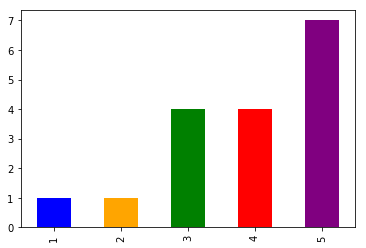

In [5]:
bar = pd.Series(0, index=['1', '2', '3', '4', '5'])
for i in range(0, pd_data[pd_data.ProfileName == 'c2']['Score'].size):
    index = pd_data[pd_data.ProfileName == 'c2']['Score'].values[i]
    bar.values[index-1]+=1
bar.plot.bar(color=['blue', 'orange', 'green', 'red', 'purple'])

## 3. Plot pandas Series DataFrame (Time->Date)

In [6]:
# need to group by Time, so must use dataframe to expression
pd_time = pd.DataFrame(pd_data['Time'])

# only need to count the year, so force change type frome float to int
pd_time = (pd_time/60/60/24/365.25+1970).astype('int64')

pd_time = pd_time.groupby(['Time'])
pd_time.size()

Time
2000       2
2004      20
2005      28
2006     123
2007     369
2008     508
2009    1193
2010    1631
2011    2890
2012    3236
dtype: int64

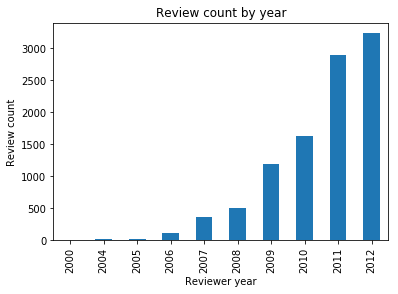

In [7]:
# plot bar
time_bar = pd_time.size().plot.bar()
time_bar.set_xlabel("Reviewer year")
time_bar.set_ylabel("Review count")
time_bar.set_title('Review count by year')
time_bar

## 4. Plot HeatMap using seaborn

In [8]:
# extract data and correlation
pd_feature = pd_data[['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']]
pd_feature.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,0.013141,0.010480,-0.022696,0.030299
HelpfulnessNumerator,0.013141,1.000000,0.969580,-0.024280,-0.178248
HelpfulnessDenominator,0.010480,0.969580,1.000000,-0.102559,-0.197157
Score,-0.022696,-0.024280,-0.102559,1.000000,-0.034358
Time,0.030299,-0.178248,-0.197157,-0.034358,1.000000


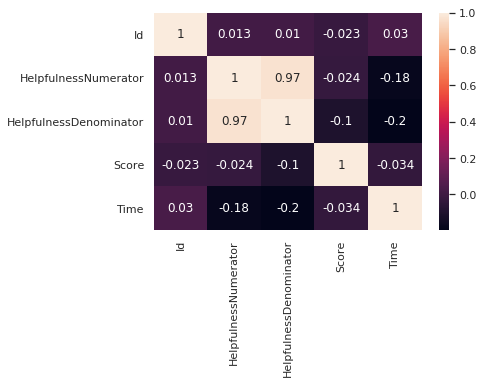

In [9]:
import seaborn as sns
sns.set()
ax = sns.heatmap(pd_feature.corr(), annot=True)

## 5. Helpful percent

In [10]:
# filter the some case of data, but all the dataset change nothing
pd_filter = pd_data[['HelpfulnessNumerator', 'HelpfulnessDenominator']]
fil = pd_filter['HelpfulnessNumerator'] <= pd_filter['HelpfulnessDenominator']
pd_filter[fil].shape

(10000, 2)

In [11]:
# Get the ratio, and replace nan with -1
pd_filter_ratio = pd_filter['HelpfulnessNumerator']/pd_filter['HelpfulnessDenominator']
pd_filter_ratio.fillna(-1, inplace = True)
pd_filter_ratio

0       1.000000
1      -1.000000
2       1.000000
3       1.000000
4      -1.000000
5      -1.000000
6      -1.000000
7      -1.000000
8       1.000000
9      -1.000000
10      1.000000
11      1.000000
12      1.000000
13      1.000000
14      0.800000
15      0.800000
16     -1.000000
17     -1.000000
18     -1.000000
19     -1.000000
20     -1.000000
21     -1.000000
22     -1.000000
23     -1.000000
24     -1.000000
25     -1.000000
26      0.000000
27      0.000000
28     -1.000000
29      1.000000
          ...   
9970    0.500000
9971    0.615385
9972    0.000000
9973    0.000000
9974    0.000000
9975    0.000000
9976    0.200000
9977    0.093750
9978   -1.000000
9979   -1.000000
9980    1.000000
9981   -1.000000
9982   -1.000000
9983   -1.000000
9984   -1.000000
9985    0.791667
9986    0.750000
9987    1.000000
9988    1.000000
9989    0.800000
9990    0.750000
9991    0.705882
9992    1.000000
9993    1.000000
9994    0.750000
9995    0.666667
9996    0.666667
9997   -1.0000

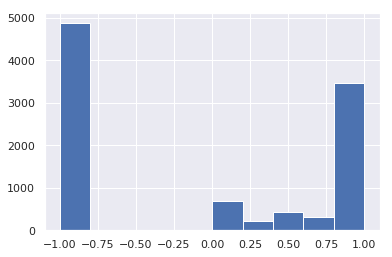

In [12]:
pd_filter_ratio.hist()